In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year_sold'] = df['date'].apply(lambda x: x.year)

In [11]:
df['month_sold'] = df['date'].apply(lambda x: x.month)

In [13]:
df['day_of_week_sold'] = df['date'].apply(lambda x: x.weekday())

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_of_week_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,2


In [15]:
def convert_day(x):
    if x==0:
        return "Monday"
    elif x==1:
        return "Tuesday"
    elif x==2:
        return "Wednesday"
    elif x==3:
        return "Thursday"
    elif x==4:
        return "Friday"
    elif x==5:
        return "Saturday"
    elif x==6:
        return "Sunday"

In [16]:
df['day_of_week_sold'] = df['day_of_week_sold'].apply(convert_day)

In [18]:
months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month_sold'] = df['month_sold'].map(months)

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_of_week_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,Oct,Monday
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,Dec,Tuesday
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,Feb,Wednesday
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,Dec,Tuesday
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,Feb,Wednesday


In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold',
       'day_of_week_sold'],
      dtype='object')

In [36]:
def convert_floors(x):
    return str(x) + "_floors"

def convert_view(x):
    return str(x) + "_view"

def convert_condition(x):
    return str(x) + "_condition"

def convert_grade(x):
    return str(x) + "_grade"

def convert_zip(x):
    return str(x) + "_zip"

def convert_bed(x):
    return str(x) + '_bed'

def convert_bath(x):
    return str(x) + '_bath'

In [37]:
df['bathrooms'] = df['bathrooms'].apply(convert_bath)

In [39]:
df['floors'] = df['floors'].apply(convert_floors)
df['view'] = df['view'].apply(convert_view)
df['condition'] = df['condition'].apply(convert_condition)
df['grade'] = df['grade'].apply(convert_grade)
df['zipcode'] = df['zipcode'].apply(convert_zip)
df['bedrooms'] = df['bedrooms'].apply(convert_bed)


In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_of_week_sold
0,7129300520,2014-10-13,221900.0,3_bed,1.0_bath,1180,5650,1.0_floors,0,0_view,...,1955,0,98178_zip,47.5112,-122.257,1340,5650,2014,Oct,Monday
1,6414100192,2014-12-09,538000.0,3_bed,2.25_bath,2570,7242,2.0_floors,0,0_view,...,1951,1991,98125_zip,47.7210,-122.319,1690,7639,2014,Dec,Tuesday
2,5631500400,2015-02-25,180000.0,2_bed,1.0_bath,770,10000,1.0_floors,0,0_view,...,1933,0,98028_zip,47.7379,-122.233,2720,8062,2015,Feb,Wednesday
3,2487200875,2014-12-09,604000.0,4_bed,3.0_bath,1960,5000,1.0_floors,0,0_view,...,1965,0,98136_zip,47.5208,-122.393,1360,5000,2014,Dec,Tuesday
4,1954400510,2015-02-18,510000.0,3_bed,2.0_bath,1680,8080,1.0_floors,0,0_view,...,1987,0,98074_zip,47.6168,-122.045,1800,7503,2015,Feb,Wednesday


In [43]:
df_dummies = pd.get_dummies(df, columns=['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade','zipcode',
       'month_sold',
       'day_of_week_sold'],dtype=int)

In [46]:
df_dummies

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,month_sold_Nov,month_sold_Oct,month_sold_Sep,day_of_week_sold_Friday,day_of_week_sold_Monday,day_of_week_sold_Saturday,day_of_week_sold_Sunday,day_of_week_sold_Thursday,day_of_week_sold_Tuesday,day_of_week_sold_Wednesday
0,7129300520,2014-10-13,221900.0,1180,5650,0,1180,0,1955,0,...,0,1,0,0,1,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,2570,7242,0,2170,400,1951,1991,...,0,0,0,0,0,0,0,0,1,0
2,5631500400,2015-02-25,180000.0,770,10000,0,770,0,1933,0,...,0,0,0,0,0,0,0,0,0,1
3,2487200875,2014-12-09,604000.0,1960,5000,0,1050,910,1965,0,...,0,0,0,0,0,0,0,0,1,0
4,1954400510,2015-02-18,510000.0,1680,8080,0,1680,0,1987,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,1530,1131,0,1530,0,2009,0,...,0,0,0,0,0,0,0,0,0,1
21609,6600060120,2015-02-23,400000.0,2310,5813,0,2310,0,2014,0,...,0,0,0,0,1,0,0,0,0,0
21610,1523300141,2014-06-23,402101.0,1020,1350,0,1020,0,2009,0,...,0,0,0,0,1,0,0,0,0,0
21611,291310100,2015-01-16,400000.0,1600,2388,0,1600,0,2004,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
Y = df_dummies['price']
X = df_dummies.loc[:,'sqft_living':]

In [49]:
X = sm.add_constant(X)

In [50]:
model = sm.OLS(Y,X).fit()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     721.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:47:25   Log-Likelihood:            -2.8746e+05
No. Observations:               21613   AIC:                         5.752e+05
Df Residuals:                   21450   BIC:                         5.765e+05
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
X.drop(['yr_built','bathrooms_7.75_bath','bedrooms_33_bed','floors_3.5_floors','view_4_view','condition_5_condition','grade_13_grade','zipcode_98039_zip'],axis=1, inplace=True)

<Axes: xlabel='bedrooms', ylabel='price'>

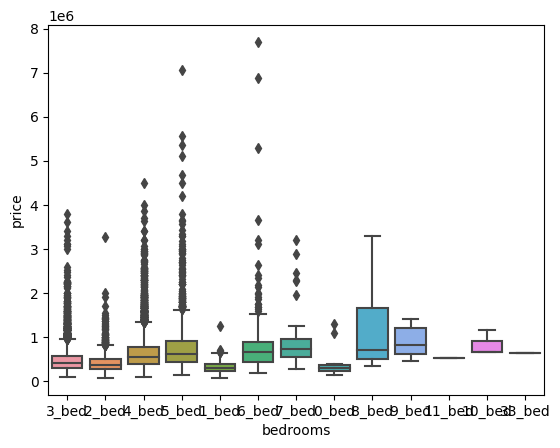

In [54]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [53]:
model2 = sm.OLS(Y,X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     726.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:56:35   Log-Likelihood:            -2.8746e+05
No. Observations:               21613   AIC:                         5.752e+05
Df Residuals:                   21451   BIC:                         5.765e+05
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
X.drop(['bedrooms_0_bed', 'bedrooms_10_bed', 'bedrooms_11_bed',
       'bedrooms_1_bed', 'bedrooms_2_bed', 'bedrooms_3_bed', 'bedrooms_4_bed',
       'bedrooms_5_bed', 'bedrooms_6_bed', 'bedrooms_7_bed','bedrooms_8_bed','bedrooms_9_bed','floors_1.0_floors','floors_1.5_floors','floors_2.0_floors','floors_2.5_floors','floors_3.0_floors'],
       axis=1,inplace=True)

In [59]:
model3 = sm.OLS(Y,X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     798.5
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:03:22   Log-Likelihood:            -2.8762e+05
No. Observations:               21613   AIC:                         5.755e+05
Df Residuals:                   21468   BIC:                         5.767e+05
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [60]:
import matplotlib.pyplot as plt

In [65]:
import numpy as np

In [63]:
influence = model3.get_influence()

In [64]:
(c,p) = influence.cooks_distance

/usr/local/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


In [66]:
n = len(df_dummies)
high_influence = np.where(c > 4/n)[0]

In [68]:
high_influence

array([    5,    21,    36, ..., 21576, 21597, 21600])

In [69]:
infl_points = df_dummies.iloc[high_influence]

<Axes: xlabel='price', ylabel='Count'>

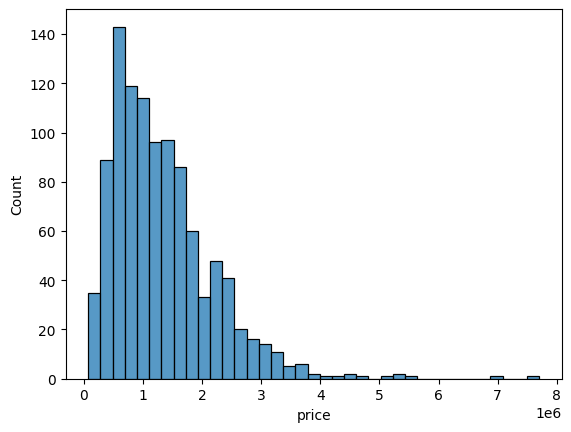

In [70]:
sns.histplot(infl_points['price'])

<Axes: xlabel='sqft_living', ylabel='Count'>

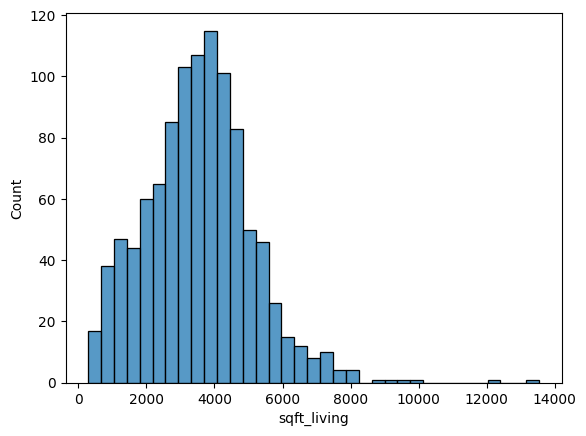

In [71]:
sns.histplot(infl_points['sqft_living'])

In [76]:
# remove them and see if model performance improves
X.drop(high_influence, inplace=True)

In [78]:
Y.drop(high_influence, inplace=True)

In [79]:
model4 = sm.OLS(Y,X).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:24:50   Log-Likelihood:            -2.6280e+05
No. Observations:               20567   AIC:                         5.259e+05
Df Residuals:                   20432   BIC:                         5.269e+05
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [80]:
# let's make some predictions
pred = model4.predict(X)

In [83]:
pred = model4.fittedvalues.copy()

In [84]:
actuals = Y.copy()

In [85]:
res = actuals - pred

In [87]:
res

0         24552.980653
1        -37007.460916
2        -81504.936068
3         63373.675112
4         54669.724909
             ...      
21608   -186574.277976
21609    -34513.220994
21610     48820.923660
21611    -13818.887854
21612    -20892.042543
Length: 20567, dtype: float64

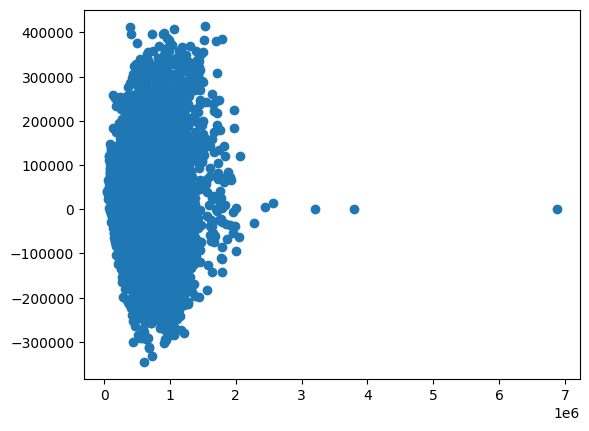

In [88]:
# fitted vs residuals plot
plt.scatter(pred, res)

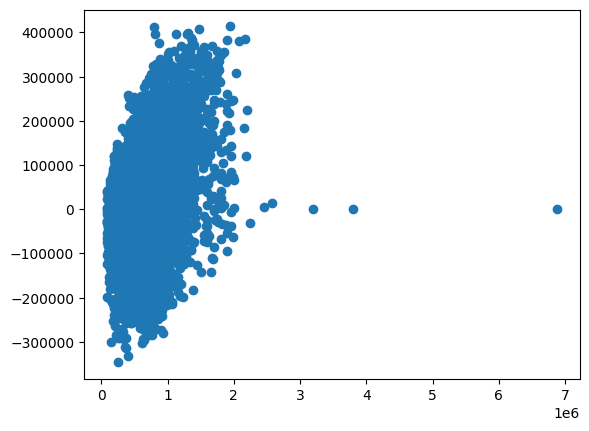

In [89]:
plt.scatter(actuals,res)

<Axes: ylabel='Count'>

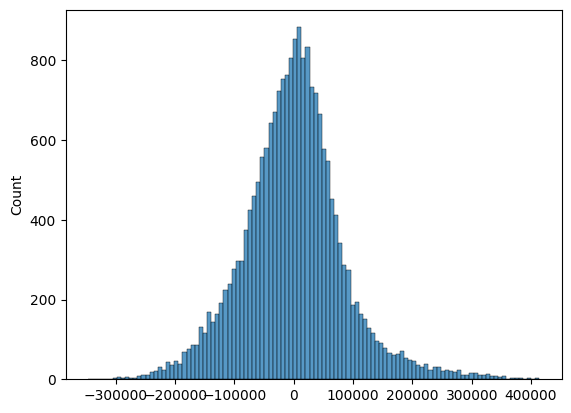

In [90]:
sns.histplot(res)

((array([-3.98527266, -3.76944843, -3.65136507, ...,  3.65136507,
          3.76944843,  3.98527266]),
  array([-346506.48215163, -332637.13814411, -313504.38952024, ...,
          408001.07446343,  412729.14628049,  413577.24414697])),
 (84754.30128759105, -2.384884422021275e-06, 0.9886832886908535))

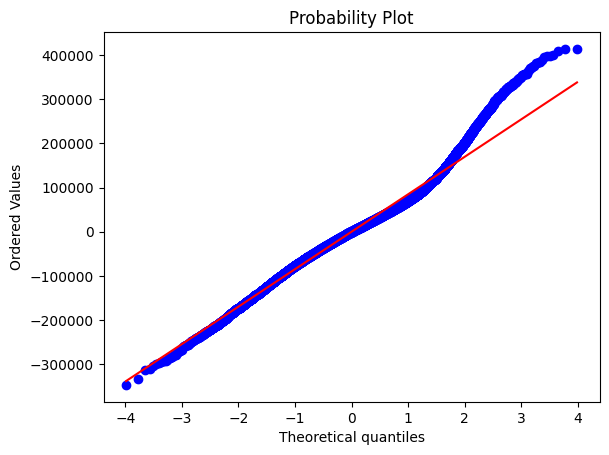

In [92]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res, dist='norm', plot=ax)

In [94]:
X.head()

,const,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,...,month_sold_Nov,month_sold_Oct,month_sold_Sep,day_of_week_sold_Friday,day_of_week_sold_Monday,day_of_week_sold_Saturday,day_of_week_sold_Sunday,day_of_week_sold_Thursday,day_of_week_sold_Tuesday,day_of_week_sold_Wednesday
0,1.0,1180,5650,0,1180,0,0,47.5112,-122.257,1340,...,0,1,0,0,1,0,0,0,0,0
1,1.0,2570,7242,0,2170,400,1991,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,0,1,0
2,1.0,770,10000,0,770,0,0,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1960,5000,0,1050,910,0,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1680,8080,0,1680,0,0,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,1


In [99]:
model4.predict(X[(X['bathrooms_1.0_bath']<=2)&(X['sqft_living']>1500)&(X['sqft_living']<1800)]).mean()

416180.0339006339